<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Solutions

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [2]:
import pandas as pd
import numpy as np
from math import factorial
import matplotlib.pylab as plt
from scipy.special import binom
from scipy.stats import poisson
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

**Solution**: 

We need to choose $c$ such that $f(x)$ integrates to 1.  We have:

$\begin{align}
 1 &\stackrel{\heartsuit}{=} \int_{-\infty}^\infty f(x) dx \\
   &= \int_0^\infty c \ x \ e^{-x^2/10}\ dx \qquad \text{let } u=x^2, du = 2xdx\\
   &= \dfrac{c}{2} \int_0^\infty e^{-u/10}\ du \\
   &= -\dfrac{10c}{2} e^{-u/10} \bigg|_0^\infty \\
   &= -5c \left(e^{-\infty} - e^0\right) \qquad \text{technically, we should be taking a limit...}\\
   &= -5c \left(0 - 1\right) \\
   &= 5c \\
\Rightarrow& ~~\fbox{$c=\dfrac{1}{5}$}
\end{align}$

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

**Solution**:

Integrating from $0$ to $x$, we have...

$\begin{align}
 F(x) &= \int_0^x f(y) dy \\
      &= \int_0^x \dfrac{1}{5} e^{(-y^2/10)}\ dy \qquad \text{let } u = y^2, du = 2ydy\\
      &= \int_0^{x^2} \dfrac{1}{10} e^{(-u/10)}\ du \\
      &= -\dfrac{10}{10} e^{(-u/10)} \bigg|_0^{x^2} \\
      &= - \left(e^{(-x^2/10)} - e^0\right) \\
      &= 1 - e^{(-x^2/10)}
\Rightarrow& ~~ \fbox{$F(x) = 1 - e^{(-x^2/10)}$}
 \end{align}$
 
 
 
**Lower bound check:** 
$F(0)$ should equal 0 because no probability mass should have accumulated at the lower bound of the support for $x$. 

We check:  $F(0) = 1 - e^{(-0^2/10)} = 1 - e^0 = 1-1 = 0 \ \checkmark$

**Upper bound check:**
$\displaystyle \lim_{x\rightarrow\infty} F(x)$ should equal 1 because we will have accumulated *all* of the probability mass as $x \rightarrow \infty$.

We check:  $\displaystyle \lim_{x\rightarrow\infty} F(x) = \lim_{x\rightarrow\infty} 1 - e^{(-x^2/10)} = 1-0 = 1 \ \checkmark$

Having passed both sanity checks, we are confident that if we are insane, it is not for these reasons.

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

**Solution:**

Median is special because there is exactly 0.50 probability mass lying above *and below* $\tilde{x}$. So:

$\begin{align}
  \frac{1}{2} &\stackrel{\heartsuit}{=} \int_0^\tilde{x} \frac{1}{5}\ y\ e^{(-y^2/10)}\ dy \qquad \text{let } u=y^2, du = 2ydy\\
      &= \frac{1}{10} \int_0^{\tilde{x}^2} e^{-u/10} du \\
      &= -\frac{10}{10} e^{-u/10} \bigg|_0^{\tilde{x}^2} \\
      &= - \left( e^{-\tilde{x}^2/10} - e^0\right) \\
      &= 1- e^{-\tilde{x}^2/10} \\
e^{-\tilde{x}^2/10} &= \frac{1}{2} \\
\frac{-\tilde{x}^2}{10} &= -\log{2} \\
\tilde{x}^2 &= 10 \log{2} \\
\tilde{x} &= \sqrt{10 \log{2}}
\Rightarrow& ~~ \fbox{$\tilde{x} = \sqrt{10 \log{2}} \approx 2.63$}
\end{align}$

**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

**Solution**: 

We have:

$\begin{align}
P(X \geq 6) &= 1 - P(X \leq 6) = 1 - F(6) \\
            &= 1 - \left[1-e^{(-6^2/10)}\right] \\
            &= e^{(-3.6)} \\
            &\approx 0.0273
\end{align}$

Thus the probability of an Octogeddon is about $\fbox{$0.0273$}$

In [21]:
np.exp(-3.6)

0.027323722447292559

**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

**Solution**: 

We want to calculate the probability of observing 3 storms **AND** none of the 3 storms being an Octogeddon.

Storms occur at an average rate of 5 per year, so we can model this as a Poisson process with rate parameter $\lambda = 5$ (storms/year). So the probability of observing 3 storms in a year is:

$P(3 \text{ storms}) = \dfrac{(5)^3 \cdot e^{-5}}{3!} \approx 0.14037$

Now, *given* that 3 storms occurred and assuming each storm is independent, the probability of 3 storms all not being Octogeddons is the probability of a single storm not being an Octogeddon, raised to the 3rd power. This is:

$P(3 \text{ non-Octogeddon storms} \mid 3 \text{ storms}) = (1-e^{-3.6})^3 \approx 0.92025$

So we have:

$\begin{align}
P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms}) &= P(3 \text{ non-Octogeddon storms} \mid 3 \text{ storms}) P(3 \text{ storms}) \\
 &= 0.92025 \cdot 0.14037 \\
 &= \fbox{$0.12918$}
 \end{align}$

In [31]:
print('{:0.5f}'.format(5**3 * np.exp(-5)/factorial(3)))
print('{:0.5f}'.format((1-np.exp(-3.6))**3))
print('{:0.5f}'.format(5**3 * np.exp(-5)/factorial(3)*(1-np.exp(-3.6))**3))

0.14037
0.92025
0.12918


<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

**Solution**: 

The **number** of customers who pass through each line is well-described by Poisson distributions with rate parameters:
* John: $\lambda = 4$
* Self check-out, working: $\lambda = 5$
* Self check-out, frozen: $\lambda = 1$

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

**Solution**:

Below is a function to calculate the Poisson probability of tending `hits` customers in a 10-minute window, given rate parameter `rate` is the average number of customers per 10 minutes:

In [3]:
def pmf_pois(hits, rate):
    return (rate**hits)*np.exp(-rate)/np.math.factorial(hits)

We calculate the probabilities in the problem as follows:

In [4]:
print('Probability John serves 6 customers in the next 10 minutes = {:0.3f}'.format(pmf_pois(hits=6, rate=4)))
print('... self check-out, working = {:0.3f}'.format(pmf_pois(hits=6, rate=5)))
print('... self check-out, frozen = {:0.3f}'.format(pmf_pois(hits=6, rate=1)))

Probability John serves 6 customers in the next 10 minutes = 0.104
... self check-out, working = 0.146
... self check-out, frozen = 0.001


**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

**Solution:**

LTP gives:

$\begin{align}
 P(6) &= P(6 \mid working)P(working) + P(6 \mid frozen)P(frozen) \\
      &= 0.146 \cdot 0.9 + 0.001 \cdot 0.1 \\
      &\approx \fbox{$0.132$}
\end{align}$

In [5]:
print(pmf_pois(hits=6, rate=5)*0.9 + pmf_pois(hits=6, rate=1)*0.1)

0.131651621693


**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

**Solution:**

The probability that John serves 100 or more customers is 1 minus the probability that he serves 99 or fewer.  The latter probability is the cumulative distribution function for the Poisson distribution describing John's check-out line.

The catch is that we are examining a **5-hour window** instead of our original 10-minute time interval.  So we need to scale the rate parameter acccordingly, where $t$ is the number of time intervals we are examining:
$$\text{new rate} = \lambda t = 4 \cdot \dfrac{\text{5 hours}}{\text{10 minutes}} = 4 \cdot \dfrac{5 \cdot 60}{10} = 120$$

Now for a 5-hour window, the distribution of customers served by John's check-out line $\sim Pois(\lambda t)$, and we need to add up the probability mass for # customers $\leq 99$:

In [6]:
rate1 = 4*5*60/10
cdf = np.sum([pmf_pois(hits=k, rate=rate1) for k in range(100)])
print('P(John serves \u2265 100 customers) = {:0.3f}'.format(1-cdf))

P(John serves ≥ 100 customers) = 0.972


**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [9]:
# Solution:

# First, a note about the use of np.random.exponential:

# scale parameter in np.random.exponential is 1/lambda (1/rate)
# since E[X] = 1/lambda, 
rate = 4 # lambda
times = np.random.exponential(scale=1/rate, size=100000)
#print('lambda (rate) = {} gives mean(X) = {:0.3f}'.format(rate, np.mean(times)))

# Now, actual code!

def checkout_count(time_len, rate_work, rate_broken, p):
    '''
    time_len    = time interval (minutes)
    rate_work   = rate when machine is working (customers/time unit)
    rate_broken = rate when machine is broken (customers/time unit)
    p           = probability machine is working
    '''
    working = np.random.choice([True, False], p=[p, 1-p])
    rate = rate_work if working else rate_broken
    time, cust = np.random.exponential(1/rate), 0
    while time <= time_len:
        cust += 1
        working = np.random.choice([True, False], p=[p, 1-p])
        rate = rate_work if working else rate_broken
        time += np.random.exponential(1/rate)
    
    return cust

The following code scales the rate parameters to be in units of "counts per 5-hour interval", so the time length argument of `checkout_count` is 1 (one 5-hour interval).

In [10]:
rate_work = 5*5*60/10
rate_broken = 1*5*60/10
p = 0.9

machine = [checkout_count(1, rate_work, rate_broken, p) for k in range(10000)]
p100_machine = len([cnt for cnt in machine if cnt>=100])/len(machine)
print('Probability that the machine serves 100 or more customers in a 5-hour block = {:.3f}'.format(p100_machine))

john = [checkout_count(1, 120, -999, 1) for k in range(10000)]
p100_john = len([cnt for cnt in john if cnt>=100])/len(john)    
print('Probability that John serves 100 or more customers in a 5-hour block = {:.3f}'.format(p100_john))

Probability that the machine serves 100 or more customers in a 5-hour block = 0.706
Probability that John serves 100 or more customers in a 5-hour block = 0.970


**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

**Solution:**

It is substantially more likely that John will serve 100 or more customers than the check-out machine. Thus, it seems like he is a better investment for the grocery store. Of course, this neglects the *costs* associated with human employees versus automated machines.

<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [3]:
def pmf_natural(x):
    return np.log10((x + 1)/x)

pmf = np.array([pmf_natural(x) for x in range(1,10)])
print("f(x) \u2265 0 for all x = {}".format(np.all(pmf >= 0)))
print("sum(f(x)) for x = 1, 2, ..., 9 is {}".format(np.sum(pmf)))

f(x) ≥ 0 for all x = True
sum(f(x)) for x = 1, 2, ..., 9 is 0.9999999999999999


**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

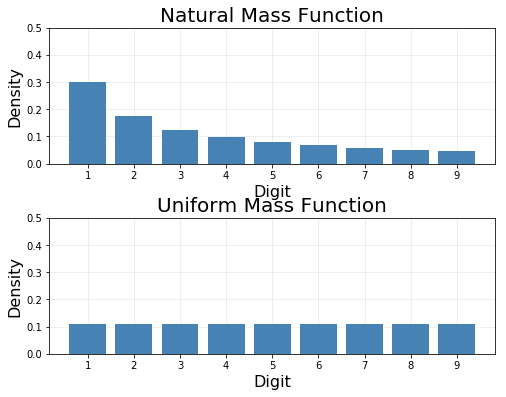

In [5]:
def natural_vs_uniform():
    
    pmf_X = np.array([pmf_natural(x) for x in range(1,10)])
    pmf_U = (1/9) * np.ones(9)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6)) 
    
    axes[0].bar(range(1,10), pmf_X, color="steelblue")
    axes[1].bar(range(1,10), pmf_U, color="steelblue")
    
    for ax in axes:
        ax.set_ylim([0,.5])
        ax.grid(True, alpha=0.25)
        ax.set_axisbelow(True)
        ax.set_xlabel("Digit", fontsize=16)
        ax.set_ylabel("Density", fontsize=16)
        plt.sca(ax)
        plt.xticks(range(1,10))
        
    axes[0].set_title("Natural Mass Function", fontsize=20)
    axes[1].set_title("Uniform Mass Function", fontsize=20)
    
    fig.subplots_adjust(hspace=0.4)

    
natural_vs_uniform()

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [6]:
def cdf_natural(y):
    
    cdf = 0 
    for aa in range(1, np.min([int(y),9])+1):
        cdf += pmf_natural(aa)
    
    return cdf  

print("P(y \u2264 {}) = {:.3f}".format(4, cdf_natural(4)))
print("P(y \u2264 {}) = {:.3f}".format(5, cdf_natural(5)))

P(y ≤ 4) = 0.699
P(y ≤ 5) = 0.778


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

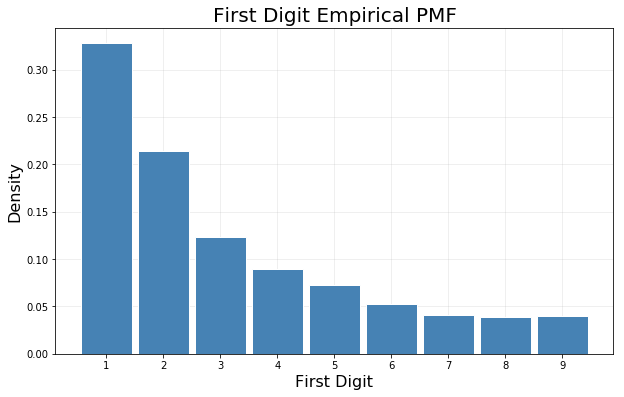

In [8]:
def first_digit(val):
    return int(str(val)[0])

def tax_histogram(df):
    df["First Digit"] = df["Tax Incomes"].apply(first_digit)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    
    bins = [ii-.5 for ii in range(1,11)]
    df["First Digit"].hist(ax=ax, bins=bins, 
                           color="steelblue", edgecolor="white", rwidth=0.9, density=True)
    
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
    plt.xticks(range(1,10))
    
    ax.set_title("First Digit Empirical PMF", fontsize=20)
    ax.set_xlabel("First Digit", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    
    
dfTax = pd.read_csv("tax_data.txt", delim_whitespace=True)
tax_histogram(dfTax)

**Solution**: The distribution of first digits in the dataset looks very much like the natural probability mass function and decidedly non-uniform in general.  Thus we conclude that the data is likely **not** fraudulent. 

<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

**Solution**: The probability that Tony will win the 9-duel series on the 8th duel played is equal to the probability that he wins 4 of the first 7 duels and then wins the 8th duel.  This is given by 


$$
{7 \choose 4}p^4(1-p)^3 \times p \quad \approx \quad 0.1642 \quad \textrm{ when } p = 0.56
$$


In [2]:
p, r, K = 0.56, 5, 8
prob = binom(K-1, r-1) * (p**r) * ((1-p)**(K-r)) 
print("P(Win on 8th Duel) = {:.4f}".format(prob))

P(Win on 8th Duel) = 0.1642


**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

**Solution**: We proceed as in **Part A**, but this time we sum the probabilities of winning on games $5, 6, 7, 8, and 9$

$$
P(\textrm{Win}) = \displaystyle\sum_{k=5}^{9} {k-1 \choose 4}p^5(1-p)^{k-5} \quad \approx \quad 0.6449 \quad \textrm{ when } p = 0.56
$$

In [13]:
p, r, N = 0.56, 5, 9
probs = np.array([binom(kk-1, r-1) * (p**r) * ((1-p)**(kk-r)) for kk in range(r,N+1)])
print("P(Win Series) = {:.4f}".format(np.sum(probs)))

P(Win Series) = 0.6449


**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of \$90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home \$10,000 _minus_ \$450 for Darth Ketelsen's fees, for a total payout of \$9,550.  What is the expected payout for a 9-duel series?   

**Solution**: We multiply the probability of winning the 9-duel tournament by the actual payout to get the expected payout.  Thus, we have 

$$
E[\textrm{Payout}] = (10000-450)\times \displaystyle\sum_{k=5}^{9} {k-1 \choose 4}p^5(1-p)^{k-5} \quad \approx \quad 8606.38 \quad \textrm{ when } p = 0.7
$$

In [4]:
p, N, fee = 0.7, 9, 90
r = (N+1) // 2 
Expected_Payout = np.sum([(10000-fee*r)*binom(kk-1, r-1) * (p**r) * ((1-p)**(kk-r)) for kk in range(r,N+1)]) 
print("E[Payout] = {:.2f}".format(Expected_Payout))

E[Payout] = 8606.38


**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

***
**Solution**: 

- Because Tony is the favorite, he should prefer a longer series because he will win more games in the long-run. 
- Because Tony has to pay Darth Ketelsen for every win, he should prefer a shorter series to keep more of that sweet sweet prize money. 

***

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [5]:
def optimal_series(p):
    return 1

Optimal Series is best-of-17 with Expected Payout of 8819.85


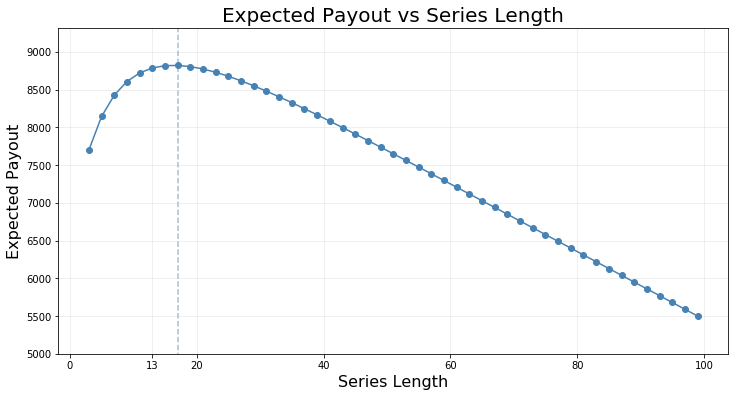

In [6]:
def N_Series_Payout(N, p, fee):
    r = (N+1) // 2 
    return np.sum([binom(K-1, r-1) * (p**r) * (1-p)**(K-r) * (10000-fee*r) for K in range(r,N+1)])

def N_Series_Prob(N, p):
    r = (N+1) // 2 
    return np.sum([binom(K-1, r-1) * (p**r) * (1-p)**(K-r) for K in range(r,N+1)])

def optimal_series(p):

    series_lengths = range(3, 99+1, 2)
    Expected_Payouts = np.array([N_Series_Payout(N, p, fee) for N in series_lengths])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

    ax.plot(series_lengths, Expected_Payouts, marker="o", color="steelblue")
    ax.grid(True, alpha=0.25)
    ax.set_axisbelow(True)

    ax.set_xlabel("Series Length", fontsize=16)
    ax.set_ylabel("Expected Payout", fontsize=16)
    ax.set_title("Expected Payout vs Series Length", fontsize=20)
    
    ax.set_ylim([np.min(Expected_Payouts)-500, np.max(Expected_Payouts)+500])

    best_ind = np.argmax(Expected_Payouts)
    print("Optimal Series is best-of-{} with Expected Payout of {:.2f}".format(2*best_ind+3, Expected_Payouts[best_ind] ))
    
    ax.plot([2*best_ind+3, 2*best_ind+3], [0,10000], color="steelblue", alpha=0.5, linestyle="--")
    
    plt.xticks([0,13,20,40,60,80,100])
    
    return 2*best_ind+3 
    
optimal_series(0.70);

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [21]:
deck = list(np.arange(13))*4
n_trials = 100000
n_hits = 0
for trial in range(n_trials):
    draws = np.random.choice(deck,size=2, replace=False)
    if np.abs(draws[0]-draws[1])<2:
        n_hits += 1
print("Prob draw two cards that are within 1 of each other = {:.3f}".format(n_hits/n_trials))

Prob draw two cards that are within 1 of each other = 0.203


**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

In [15]:
deck = list(np.arange(13))*4
n_trials = 1000000
n_hits = 0
for trial in range(n_trials):
    draws = np.random.choice(deck,size=3, replace=False)
    draws.sort()
    if ((draws[0]+1)==draws[1]) and ((draws[1]+1)==draws[2]):
        n_hits += 1
partBanswer = n_hits/n_trials
print("Prob draw three cards that form a run = {:.3f}".format(n_hits/n_trials))

Prob draw three cards that form a run = 0.032


**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?

In [18]:
deck = list(np.arange(13))*4
n_trials = 100000
n_hits = 0
for trial in range(n_trials):
    # draw 24 cards
    draws = np.random.choice(deck,size=24, replace=False)
    # Let's let aces be 0, WLOG.
    # Did we get 3 or 4 aces in those 24 cards?
    n_aces = np.sum(draws==0)
    if n_aces >= 3:
        # In the event that n_aces=3, we need for at least one ace to be in draws 16 to 24.
        # In the event that n_aces=4, we need for at least two aces to be in draws 16 to 24.
        # Putting these together, n_aces - n_window_aces <= 2
        n_window_aces = np.sum(draws[15:]==0)
        if (n_aces-n_window_aces) <= 2:
            n_hits += 1
print("Prob draw third ace between flips 16 and 24  = {:.3f}".format(n_hits/n_trials))

Prob draw third ace between flips 16 and 24  = 0.181


**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.

**Solution:**

A little scratch work.  Let $S$ be the event that we get a 3-card straight. 
$$P(X \mid S) = \frac{P(S \mid X) P(X)}{P(S)}$$

We know $P(S)$ from part B.  And $P(X) = 1/13$.  So we need to simply compute the probability of getting a straight, given that the first card is an $X$. 

In [36]:
n_trials = 100000
n_hits = np.zeros(13)
for first_card in range(13):
    # make a full deck
    deck = (list(np.arange(13))*4)
    # remove that first card (assuming that we drew it)
    deck.pop(first_card)
    for trial in range(n_trials):
        # draw two more cards
        draws = np.random.choice(deck,size=2,replace=False)
        # see if we got a straight
        draws = list(draws)+[first_card]
        draws.sort()
        if ((draws[0]+1)==draws[1]) and ((draws[1]+1)==draws[2]):
            n_hits[first_card] += 1
pSgivenX = n_hits/n_trials
pX = 1/13
pS = partBanswer
pXgivenS = pSgivenX*pX/pS


Text(0.5,0,'first card')

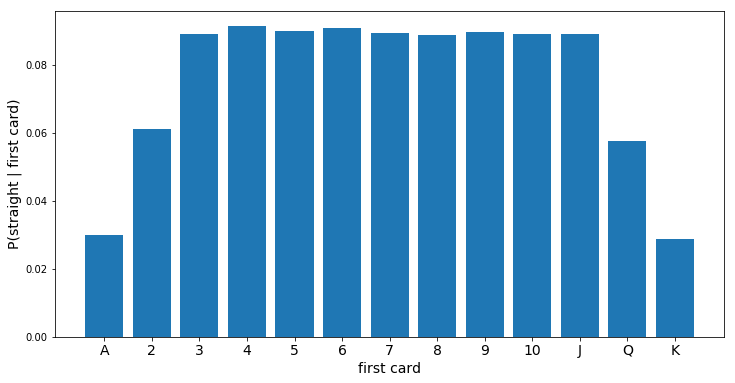

In [47]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(np.arange(13),pXgivenS)
labels = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
ax.set_xticks(range(13))
ax.set_xticklabels(labels,fontsize=14)
ax.set_ylabel('P(straight | first card)',fontsize=14)
ax.set_xlabel('first card',fontsize=14)